## Simulating Multivariate Normal Distribution with given Covariance Matrix by computing Cholesky Decomposition of Covariance Matrix.
Let ${\bf Y}=H {\bf X} + {\bf \mu}$ where ${\bf X}$ follows Standard Multivariate Normal distribution of dimension n. Here, $H=U^{-1}$ and 
$H H^\top = \Sigma$. Any $\Sigma$ (Positive-definite Symmetric Matrix) has a unique lower-triangular pseudo square-root with positive diagonal,
$L$ and all multivariate normal random vectors $\bf Y$ may be written as $Y = L \bf X + \boldsymbol{\mu}$. Hence, if we compute $L$, we can 
simulate $Y$ by first simulating $\bf X$ and then computing $L \bf X + \boldsymbol{\mu}$. We use Cholesky Decomposition to find $L$ (Note: $L L^T = \Sigma$).

Lets compute the Cholesky decomposition of following covariance matrix 
$$
\Sigma = \left( \begin{array}{cc}
10 & 2 \\
2 & 3
\end{array}
\right)$$
and use this to do scatter plot of the bivariate normal distribution with mean $0$ and covariance matrix $\Sigma$.

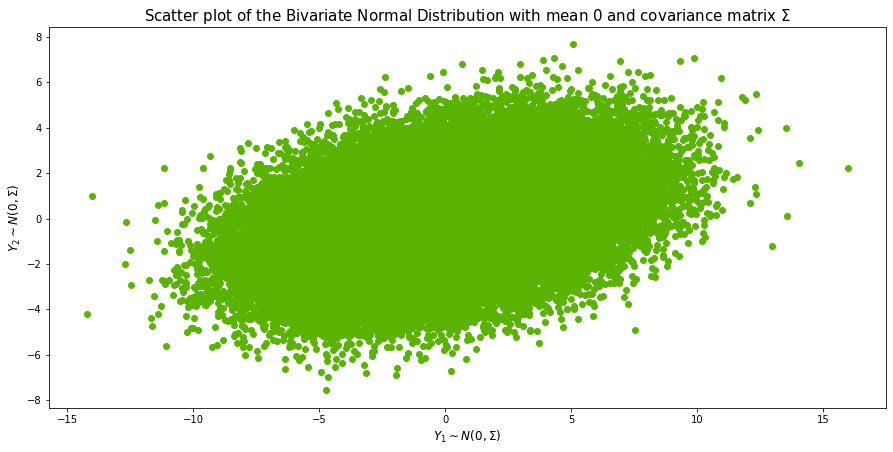

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [15,7]

sigma = np.array( [[10,2],[2,3]] )
L = np.linalg.cholesky(sigma)
sample = L @ np.random.randn(2,100000)
plt.scatter( sample[0,:],sample[1,:],color = '#59b300');
plt.title("Scatter plot of the Bivariate Normal Distribution with mean $0$ and covariance matrix $\Sigma$",fontsize=15)
plt.xlabel('$Y_1 \sim N(0,\Sigma)$',fontsize=12)
plt.ylabel('$Y_2 \sim N(0,\Sigma)$',fontsize=12)

# Testing the above code.
assert sample.shape==(2,100000), f"Wrong size sample, got: {sample.shape}"
assert np.mean(sample[0,:])<0.01  # Checks if the mean of first variable in the sample is less than 0.01.
assert np.mean(sample[1,:])<0.01
actual = np.cov(sample, rowvar=True)    # Calculates the covariance matrix of the generated sample.
assert np.linalg.norm( actual - sigma )<0.1  # Verifies that the calculated covariance matrix actual is close (within a threshold of 0.1) to the original covariance matrix sigma.

Lets write our own cholesky decomposition function using the formulae
$$L_{j,j} = \sqrt{ \Sigma_{j,j} - \sum_{k=1}^{j-1} L_{j,k}^2 } $$
and
$$L_{i,j} = \frac{1}{L_{j,j}} \left( \Sigma_{i,j} - \sum_{k=1}^{j-1} L_{i,k} L_{j,k} \right) \quad \text{for } i>j$$


In [4]:
def cholesky(x):
    # Testing validity of parameter x.
    eigenvalues, eigenvectors = np.linalg.eig(x)  # Computationally expensive method. 
    if not np.all(eigenvalues > 0):
        raise ValueError("Need positive definite symmetric matrix.")
    
    n = x.shape[0] # Initialised to number of rows/columns in the matrix x.
    l = np.zeros((n,n))  # Initialised as a square matrix of zeros with dimensions n x n. 
    for j in range(0,n):
        # Compute Diagonal Elements.
        total = x[j,j]
        for k in range(0,j):
            total = total - l[j,k]**2
        l[j,j] = np.sqrt(total)
        # Compute Sub-diagonal Elements.
        for i in range(j+1,n):
            total = x[i,j]
            for k in range(0,j):
                total = total - l[i,k]*l[j,k]
            l[i,j] = 1/l[j,j]*total
    return l

In [7]:
rho = 0.5
L = cholesky( np.array([[1,rho],[rho,1]]) )
print(f"L = {L}")
assert L[0,1]==0, "Must be lower triangular"
assert L[0,0]>0, "Must have a positive diagonal"
assert L[1,1]>0, "Must have a positive diagonal"
assert np.linalg.norm(L @ L.transpose()-np.array([[1,rho],[rho,1]]))<0.0001
L = np.array([[1,0,0],[2,3,0],[4,5,6]])
S = L @ L.transpose()
assert np.linalg.norm( cholesky(S)-L )<0.0001

L = [[1.        0.       ]
 [0.5       0.8660254]]


## Generating correlated random variables using Cholesky decomposition.

In [8]:
def generate_correlated_variables(means, cov_matrix, num_samples=1000):
    """
    Generate correlated random variables using Cholesky decomposition.
    """
    n = len(means)
    L = cholesky(cov_matrix)

    uncorrelated = np.random.randn(num_samples, n)
    correlated = np.dot(uncorrelated, L.T) + means
    return correlated

# Example usage
means = np.array([1, 2, 3])  # Mean values
cov_matrix = np.array([[2, 0.5, 0.3],
                       [0.5, 1, 0.1],
                       [0.3, 0.1, 3]])  # Covariance matrix

correlated_vars = generate_correlated_variables(means, cov_matrix, num_samples=1000)

# Testing the result: Print means and covariance of generated variables
print("Generated Means:")
print(np.mean(correlated_vars, axis=0))

print("\nGenerated Covariance Matrix:")
print(np.cov(correlated_vars, rowvar=False))

Generated Means:
[1.04312977 1.99769735 3.04296101]

Generated Covariance Matrix:
[[1.98410704 0.44299763 0.1842873 ]
 [0.44299763 0.96775427 0.01402364]
 [0.1842873  0.01402364 2.88194134]]


In [10]:
np.shape(correlated_vars)


(1000, 3)